In [279]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
file = '/Users/toddhendricks/Public/fsl/anchoring_webapp.log'
def get_proposed_contributions(path):
    data = []
    with open(file, 'r') as f:
        for line in f:
            line = json.JSONDecoder().decode(line)
            if 'extra_data' in line.keys():
                data.append(line.get('params').get('price'))
        return sorted(data)

def get_response_contributions(path):
    data = []
    with open(file, 'r') as f:
        for line in f:
            line = json.JSONDecoder().decode(line)
            if 'extra_data' in line.keys():
                data.append(line.get('extra_data').get('bid_amount'))
        return sorted(data)

In [311]:
dataframe = pd.DataFrame()
ask = get_proposed_contributions(file)
bid = get_response_contributions(file)
dataframe['bid'] = bid
dataframe['ask'] = ask
dataframe = dataframe.melt()
base = [x for x in range(len(dataframe))]
dataframe

,variable,value
0,bid,10
1,bid,15
2,bid,20
3,bid,25
4,bid,25
5,bid,30
6,bid,30
7,bid,30
8,ask,15
9,ask,19


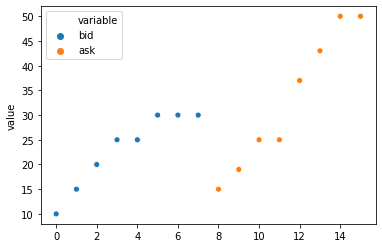

In [312]:
sns.scatterplot(data=dataframe, x=base, y='value', hue='variable')